# **Introduction**

**Problem Statement**

HDBs play an important role in the property market of Singapore. There are many factors influencing the resale prices of HDBs. Both buyers and sellers rely on intuation and outdated references to predict HDB resale prices. This causes a need for a system to predict resale prices to support fair, data-driven housing decisions.

**Proposed Use Case**

This project looks to use the structured HDB resale price dataset to create a **machine learning-based system** to estimate the resale prices of HDB. 

This model can:

- Allow buyers to check fair pricing on the flats they are interested
- Assist sellers to set competitive and market-acceptable prices.
- Assist property agents to track pricing trends and make informed decisions for clients.

**Dataset Overview**

The dataset used for this project is from **Kaggle** and it consists of various features.

- Location features: `latitude`, `longitude`, `postal_code`, `address`, `closest_mrt`, `closest_mrt_dist`, `cbd_dist`, `town`

- Flat features: `flat_type`, `floor_area_sqm`, `flat_model`, `storey_range`, `block`, `street_name`, `month`, `lease_commencement_date`, `years_remaining`

- Target Variable: `resale_price`

These features help to understand what drives HDB resale prices.

**Project Objective**

The objective of this project is to train regression algorithms to predict resale_price based on the important features from the dataset. 

**Workflow**

- Exploratory Data Analysis (EDA) & Data Cleaning
- Preprocessing & Feature Engineering
- Model Training
- Model Evaluation using performance metrics such as MAE and R2 Score 
- Cross Validation & Hyperparameter Tuning
- Learning Curve Analysis
- Best Model Analysis
- SHAP Analysis

Overall, this project sets out to use use machine learning for real world housing price prediction which is both practical and accurate.



In [1]:
# Importing the required modules for setup and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv('hdb_resale_price.csv')

# Displaying the first few rows of the dataset to understand its structure
df.head()

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
0,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,01 TO 05,68.0,Improved,1979,383000.0,66
1,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-07,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,380000.0,66
2,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,68.0,Improved,1979,378000.0,66
3,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,388000.0,66
4,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-11,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,387000.0,66


### 1. **Exploratory Data Analysis (EDA)**

In this section, tasks such as data exploration, visualization, and understanding the dataset's structure and patterns are performed. 

#### 1.1 **Dataset Integrity and Sanity Checks**

In [3]:
# The number of rows and columns in the dataset
df.shape

(52203, 18)

In [4]:
# Checking values negative or equal to 0 in numerical columns
(df.select_dtypes(include='number') <= 0).sum()

latitude               0
longitude              0
postal_code            0
closest_mrt_dist       0
cbd_dist               0
floor_area_sqm         0
lease_commence_date    0
resale_price           0
years_remaining        0
dtype: int64

In [5]:
# Provide a brief overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             52199 non-null  float64
 1   longitude            52199 non-null  float64
 2   postal_code          52196 non-null  float64
 3   address              52203 non-null  object 
 4   closest_mrt          52199 non-null  object 
 5   closest_mrt_dist     52199 non-null  float64
 6   cbd_dist             52199 non-null  float64
 7   month                52203 non-null  object 
 8   town                 52203 non-null  object 
 9   flat_type            52203 non-null  object 
 10  block                52203 non-null  object 
 11  street_name          52203 non-null  object 
 12  storey_range         52203 non-null  object 
 13  floor_area_sqm       52203 non-null  float64
 14  flat_model           52203 non-null  object 
 15  lease_commence_date  52203 non-null 

**Insights**:

- From df.info() we can see some columns have lesser non-null values than other columns, which indicate the possibility of missing values. 

- We will need to check the extent of missing values and decide how to handle them.

In [6]:
# Check for null and missing values in the column, sort it in descending order
df.isnull().sum().sort_values(ascending=False)

postal_code            7
latitude               4
closest_mrt            4
closest_mrt_dist       4
cbd_dist               4
longitude              4
storey_range           0
resale_price           0
lease_commence_date    0
flat_model             0
floor_area_sqm         0
flat_type              0
street_name            0
block                  0
town                   0
month                  0
address                0
years_remaining        0
dtype: int64

**Insights**:

- From df.isnull().sum(), we can see that latitude, longtitude, postal_code, closet_mrt, closest_mrt_dist, cbd_dist all have missing values.

In [7]:
# Calculate the percentage of missing values in each column
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Create a DataFrame to summarize the missing values and their percentages
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent.round(4)
})

# Filter out columns with missing values and sort by percentage
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
print(missing_summary.sort_values('Percentage (%)', ascending=False))


                  Missing Values  Percentage (%)
postal_code                    7          0.0134
latitude                       4          0.0077
longitude                      4          0.0077
closest_mrt                    4          0.0077
closest_mrt_dist               4          0.0077
cbd_dist                       4          0.0077


**Insights**:

- There are a total of 52203 rows of data. 

- The postal code column has 7 missing values while the columns latitude, longtitude, closest_mrt, closest_mrt_dist and cbd_dist have 4 missing values. 

- The percentage of missing values in postal code is 0.0134% while the others are 0.0077%. They make up very little percentage of the data. 

- Therefore, instead of imputing, removing them would ensure better downstream work and integrity of data.

In [8]:
# Check the number of unique values in each column (important for categorical data)
df.nunique()

latitude               8022
longitude              8003
postal_code            8021
address                8025
closest_mrt              96
closest_mrt_dist       8022
cbd_dist               8022
month                    34
town                     26
flat_type                 7
block                  2047
street_name             515
storey_range             22
floor_area_sqm          163
flat_model               17
lease_commence_date      47
resale_price           2067
years_remaining          47
dtype: int64

In [9]:
# To check for duplicate rows in the dataset
df[df.duplicated()]

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
47,1.275499,103.841398,80001.0,1 EVERTON PK,Outram Park MRT Station,513.706328,1379.225999,2014-04,BUKIT MERAH,5 ROOM,1,EVERTON PK,10 TO 12,138.0,Improved,1980,751888.0,65
168,1.307871,103.883192,390001.0,1 PINE CL,Mountbatten MRT Station,198.762784,4490.042501,2014-05,GEYLANG,4 ROOM,1,PINE CL,07 TO 09,95.0,Model A,2000,590000.0,85
275,1.440806,103.777319,730010.0,10 MARSILING DR,Marsiling MRT Station,984.626290,19294.204220,2014-04,WOODLANDS,5 ROOM,10,MARSILING DR,10 TO 12,126.0,Standard,1976,418000.0,61
523,1.397847,103.906436,822101.0,101B PUNGGOL FIELD,Sengkang MRT Station,1395.766053,14103.937545,2014-02,PUNGGOL,5 ROOM,101B,PUNGGOL FIELD,16 TO 18,110.0,Improved,2002,540888.0,87
525,1.397847,103.906436,822101.0,101B PUNGGOL FIELD,Sengkang MRT Station,1395.766053,14103.937545,2014-04,PUNGGOL,5 ROOM,101B,PUNGGOL FIELD,04 TO 06,110.0,Improved,2002,498000.0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50602,1.339116,103.686610,640902.0,902 JURONG WEST ST 91,Pioneer MRT Station,1204.048391,19350.334782,2014-04,JURONG WEST,4 ROOM,902,JURONG WEST ST 91,01 TO 03,104.0,Model A,1988,400000.0,73
50683,1.341175,103.686452,640909.0,909 JURONG WEST ST 91,Pioneer MRT Station,1273.061437,19441.077379,2014-05,JURONG WEST,4 ROOM,909,JURONG WEST ST 91,04 TO 06,104.0,Model A,1989,380000.0,74
50850,1.341455,103.687970,640914.0,914 JURONG WEST ST 91,Pioneer MRT Station,1125.181358,19292.081199,2012-05,JURONG WEST,3 ROOM,914,JURONG WEST ST 91,01 TO 05,73.0,Model A,1988,312000.0,75
51896,1.321581,103.854151,320098.0,98 WHAMPOA DR,Boon Keng MRT Station,864.461669,4277.836343,2014-03,KALLANG/WHAMPOA,3 ROOM,98,WHAMPOA DR,01 TO 03,65.0,Improved,1974,318000.0,59


**Insights**:

- From running the code df[df.duplicated()] we are able to identify 248 rows of duplicate values across 18 columns. 

- Keeping these duplicates in the dataset can cause overfitting or data leakage which will affect accuray of the models. 

- Therefore, to ensure data integrity, the first occurance of each duplicated row will be retained and the rest will be removed.

In [10]:
# Displaying the statistical summary of the dataset
df.describe()

,latitude,longitude,postal_code,closest_mrt_dist,cbd_dist,floor_area_sqm,lease_commence_date,resale_price,years_remaining
count,52199.000000,52199.000000,52196.000000,52199.000000,52199.000000,52203.000000,52203.000000,5.220300e+04,52203.000000
mean,1.364831,103.837080,544391.622768,755.305385,12412.061697,96.203285,1989.512902,4.612147e+05,75.587878
std,0.043318,0.073685,183572.080847,424.154938,4528.507318,24.984010,10.139550,1.225534e+05,10.183453
min,1.270380,103.685228,50004.000000,31.759821,592.121638,31.000000,1966.000000,1.950000e+05,52.000000
25%,1.335408,103.773674,470101.000000,446.270741,9478.343681,73.000000,1983.000000,3.700000e+05,68.000000
50%,1.358876,103.840736,560112.000000,681.337334,13182.791793,95.000000,1988.000000,4.400000e+05,74.000000
75%,1.389901,103.896538,680014.250000,964.557032,16082.019965,111.000000,1999.000000,5.250000e+05,85.000000
max,1.457071,103.987804,825195.000000,3496.402761,20225.103698,266.000000,2012.000000,1.088888e+06,98.000000


#### 1.2 **Data Cleaning**

In [11]:
# Drop the missing values from the dataset (postal_code, latitude, closest_mrt, closest_mrt_dist, cbd_dist, longtitude)
df = df.dropna()


In [12]:
# Removes all duplicate rows from the dataset, keeping the first occurrence
df = df.drop_duplicates()

In [13]:
# Check the number of rows and columns after cleaning the dataset
df.shape

(51948, 18)

### 2. **Data Visualisations**

In this section, visualisations have been done to understand and gather insights about the dataset.

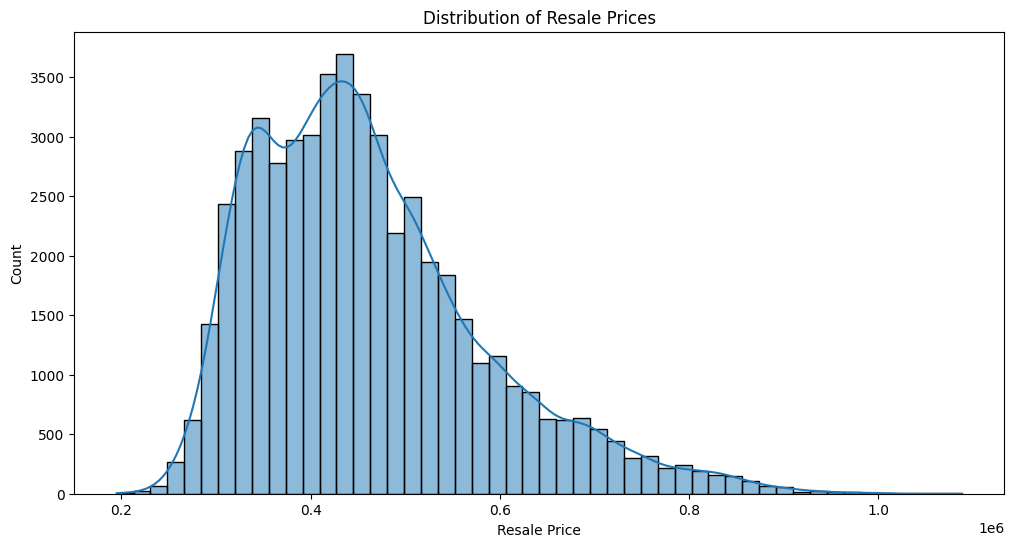

In [14]:
# Visualise the distribution of resale prices using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['resale_price'], bins=50, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.show()


**Insights:**

- The histogram shows the distribution of HDB resale prices and indicates the target is not normally distributed.

- The distribution is right-skewed, with most transactions concentrated in the mid-range (approximately 300k–500k) and a long tail of higher-priced flats.

- This skew suggests that outliers may influence error metrics and training, so we consider robust evaluation like MAE) and potential transformations (e.g. log transformation) to improve model performance.

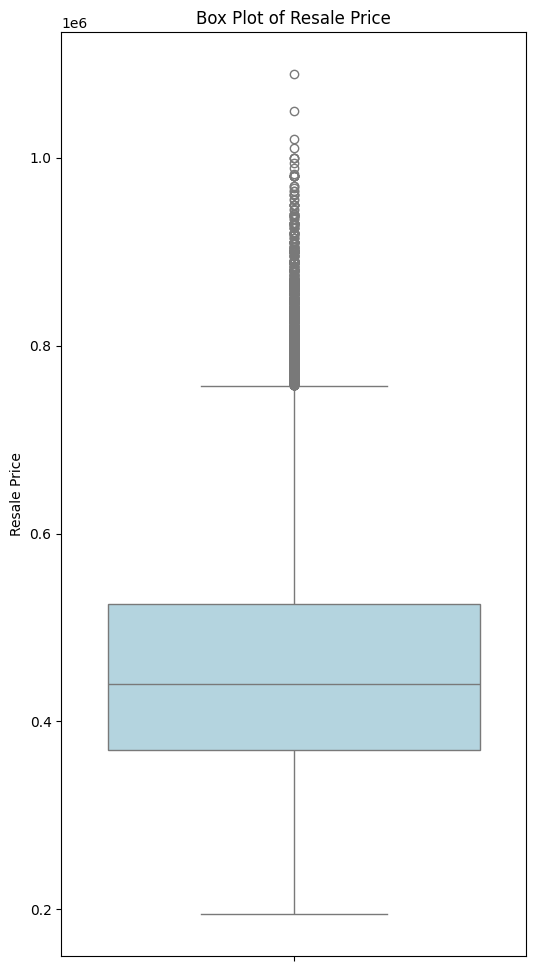

In [15]:
# Visualise the distribution of resale prices using a box plot
plt.figure(figsize=(6, 12))
sns.boxplot(y=df['resale_price'], color='lightblue')
plt.title('Box Plot of Resale Price')
plt.ylabel('Resale Price')
plt.show()


**Insights**:

- The box plot helps to visualise there are outliers in the resale price column.
 
- The values are represented by the circles above the upper whisker. 

- These points suggest that there are resale prices that are way above the typical range highlighting transactions with unusually high values.


In [16]:
# Calculate the skewness of the resale price distribution
print(f"Skewness: {df['resale_price'].skew():.4f}")

Skewness: 0.9484


**Insights**:

- The skew of the column confirms that resale price is right skewed as it has a skewness of 0.9484.

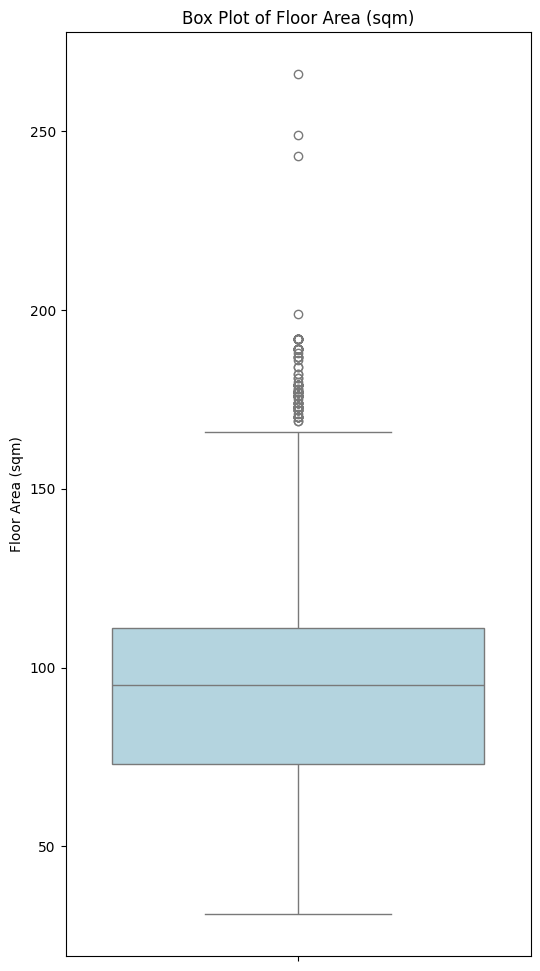

In [17]:
# Visualise the distribution of floor area using a box plot
plt.figure(figsize=(6, 12))
sns.boxplot(y=df['floor_area_sqm'], color='lightblue')
plt.title('Box Plot of Floor Area (sqm)')
plt.ylabel('Floor Area (sqm)')
plt.show()

**Insights**:

- From the box plot for floor area we can observe most HDB flats fall between approximately 70 sqm to 120 sqm.

- The median is approximately 90 sqm. 

- There are outliers present above the upper whisker which indicate the larger flats.

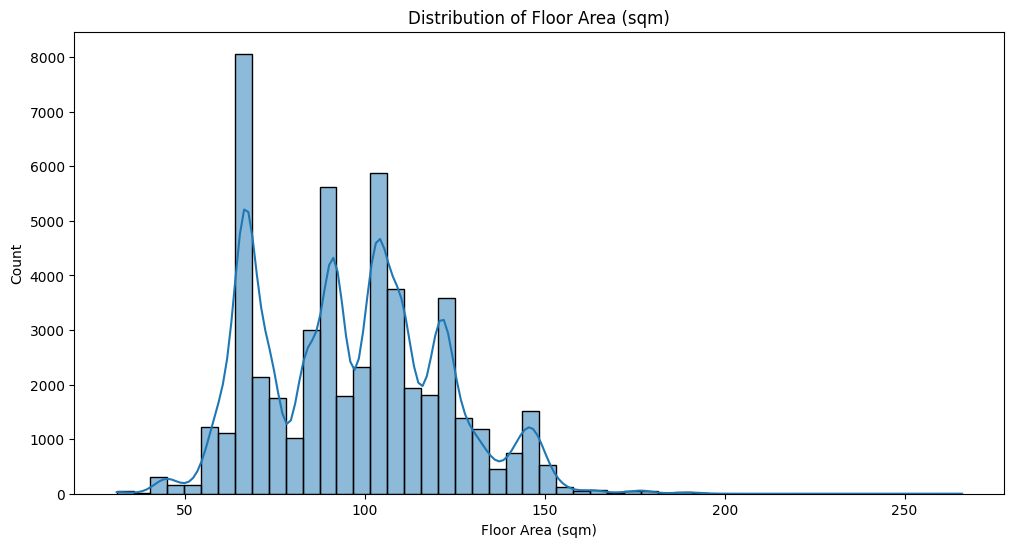

In [18]:
# Visualise the distribution of floor area using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['floor_area_sqm'], bins=50, kde=True)
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.show()


**Insights**:

- The histogram shows a multi-modal distribution with peaks at certain floor area. 

- This likely indicate the common HDB flat types. 

- It is still fairly balanced, so no further transformation needs to be done.

C:\Users\amirt\AppData\Local\Temp\ipykernel_116244\1441704429.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = tmp.groupby("area_bin").agg(


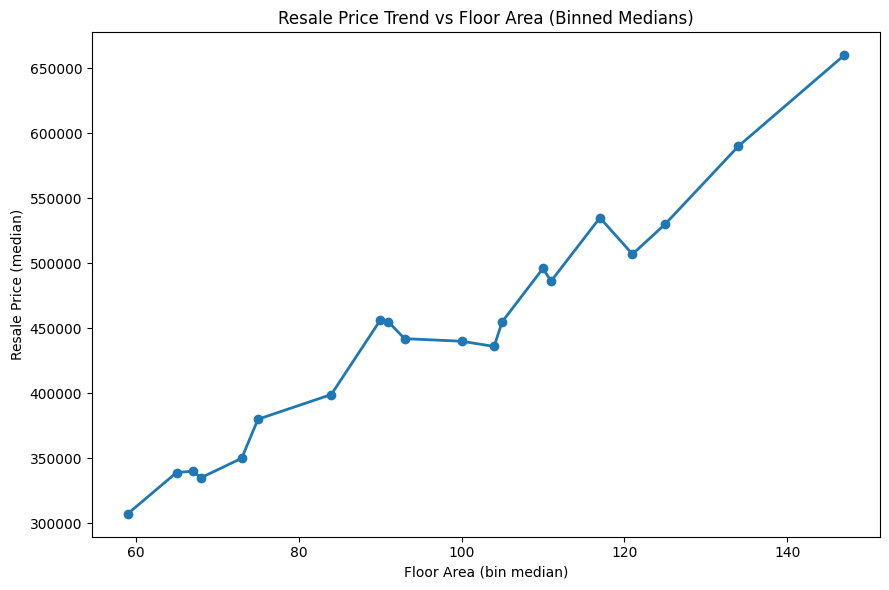

In [19]:
tmp = df[["floor_area_sqm", "resale_price"]].dropna().copy()

# Bin floor area into quantiles (equal number of samples per bin)
tmp["area_bin"] = pd.qcut(tmp["floor_area_sqm"], q=20)

trend = tmp.groupby("area_bin").agg(
    area_mid=("floor_area_sqm", "median"),
    price_median=("resale_price", "median"),
    price_mean=("resale_price", "mean")
).sort_values("area_mid")

plt.figure(figsize=(9,6))
plt.plot(trend["area_mid"], trend["price_median"], marker="o", linewidth=2)
plt.title("Resale Price Trend vs Floor Area (Binned Medians)")
plt.xlabel("Floor Area (bin median)")
plt.ylabel("Resale Price (median)")
plt.tight_layout()
plt.show()

**Insights**:

- This binned-median trend plot shows a clear positive relationship between floor area and resale price. 

- As floor area increases, the median resale price increases steadily, confirming floor_area_sqm as a strong predictor

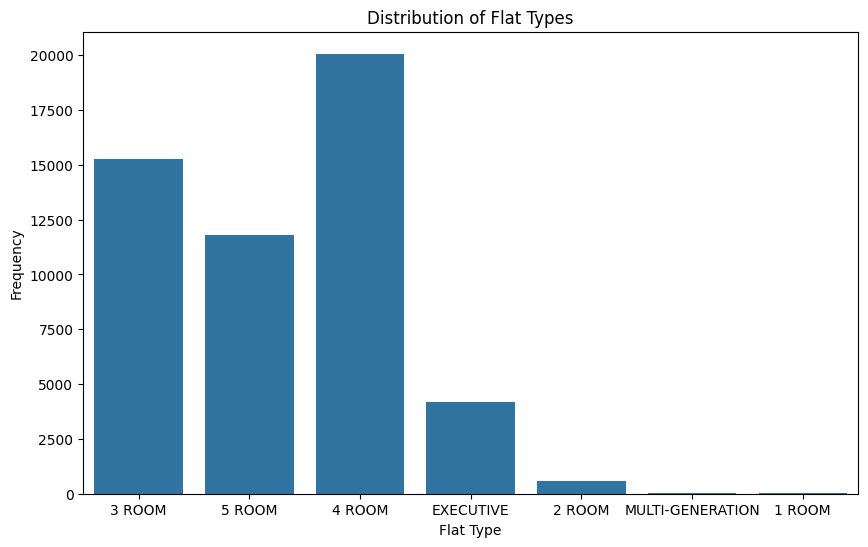

In [20]:
# Visualise the distribution of flat types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='flat_type')
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Frequency')
plt.show()

**Insights**:

 This bar chart shows the distribution of flat types. 

- It can be observed 4 Room Flats have the highest occurance. 

- The 3 Room Flats have the second highest occurance followed by 5 Room, Exectutive and 2 Room. 

- Both Multi-Generation and 1 Room Flats have the lowest occurances and are very rare. 

- This distribution highlights mid sized flats dominate the data, this might cause the predicitions of the model to be biased to these flat types.

- The ability of the model in predicting Multi-Generation/1 Room Flat might potentially be affected.

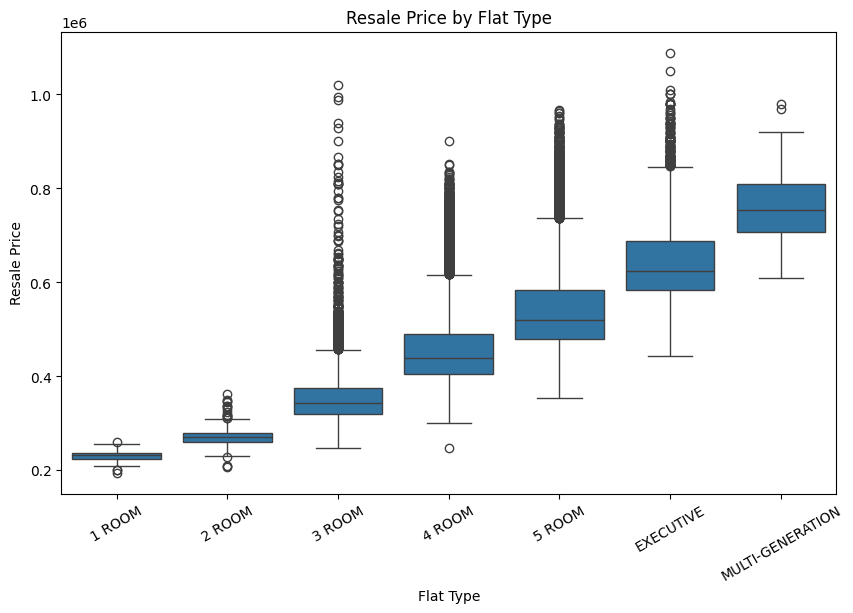

In [21]:
#Create an order
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Box plot to visualize resale prices by flat type
plt.figure(figsize=(10, 6))
sns.boxplot(x='flat_type', y='resale_price', data=df, order=order)
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=30)
plt.show()

**Insights**:

- This box plot compares resale price distributions across flat types. 

- There is a clear upward trend: larger flat types have higher median resale prices and generally higher overall price ranges. 

- This indicates that flat_type is a strong predictive categorical feature for resale_price and should be retained during modelling.

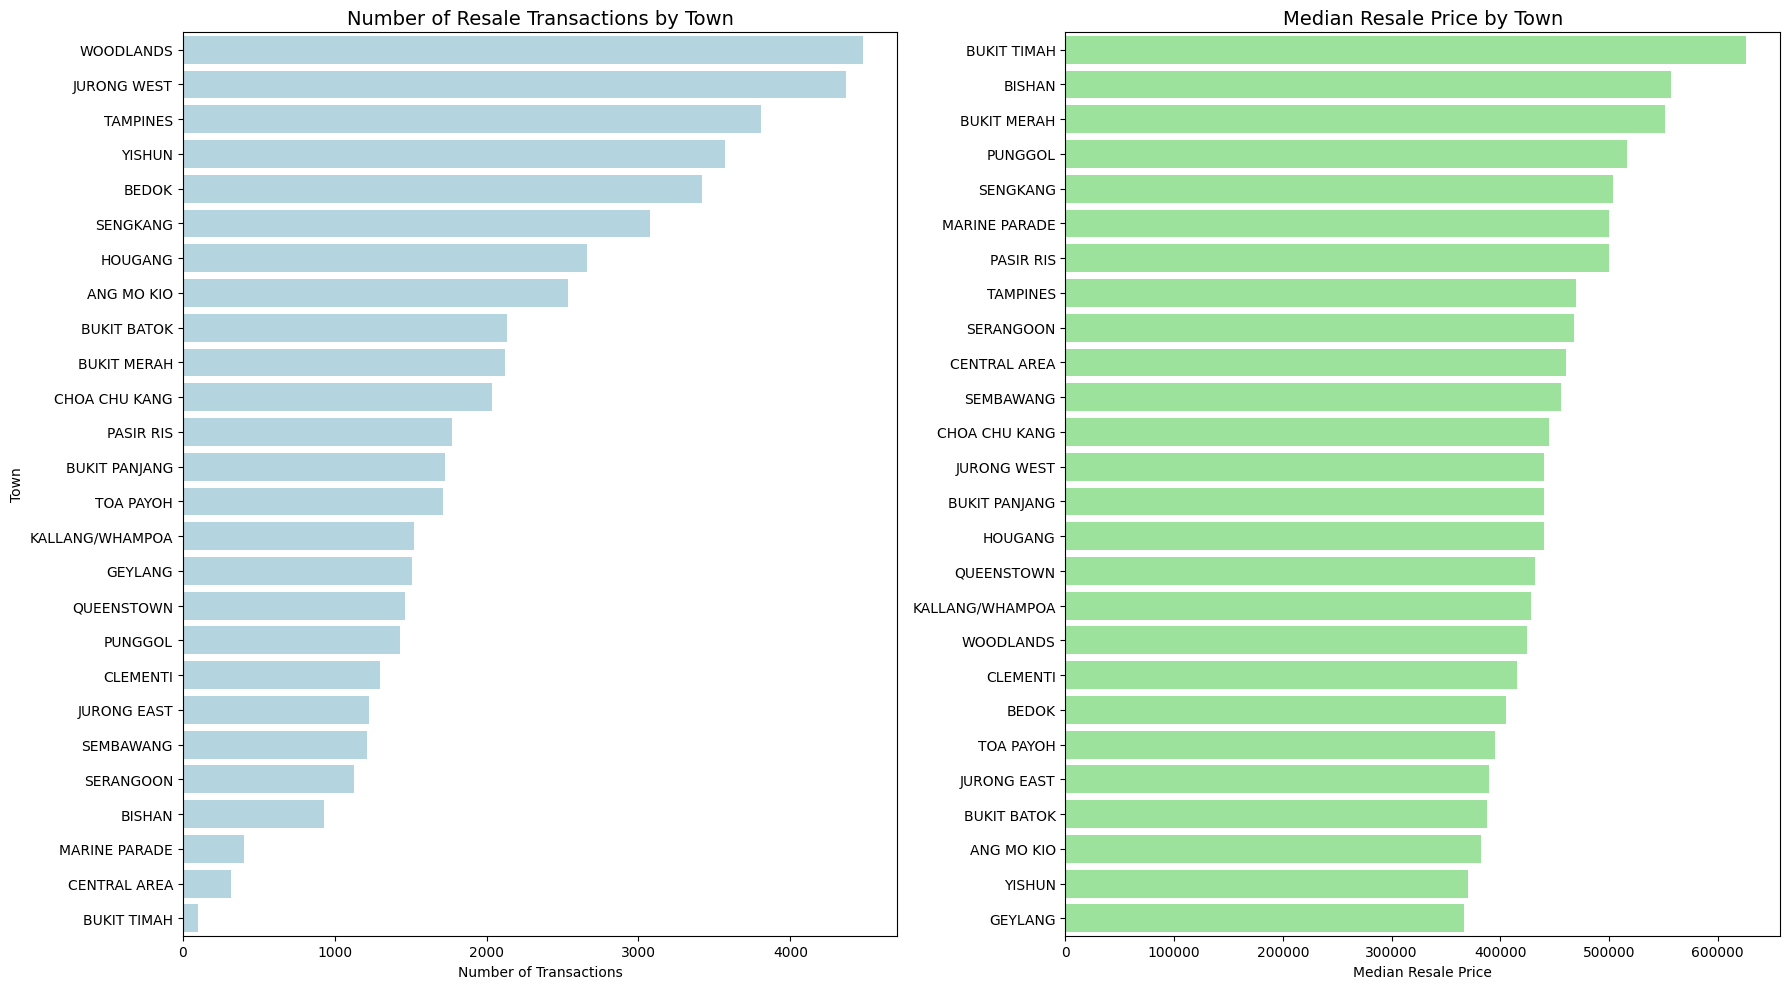

In [22]:
# Group by town and calculate the median resale price
median_price_by_town = df.groupby('town')['resale_price'].median().sort_values(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Count plot for number of resale transactions by town
sns.countplot(
    y='town',
    data=df,
    order=df['town'].value_counts().index,
    color='lightblue',
    ax=axes[0]
)
axes[0].set_title('Number of Resale Transactions by Town', fontsize=14, color='black')
axes[0].set_xlabel('Number of Transactions', color='black')
axes[0].set_ylabel('Town', color='black')

# Bar plot for median resale price by town
sns.barplot(
    x=median_price_by_town.values,
    y=median_price_by_town.index,
    color='lightgreen',
    ax=axes[1]
)
axes[1].set_title('Median Resale Price by Town', fontsize=14, color='black')
axes[1].set_xlabel('Median Resale Price', color='black')
axes[1].set_ylabel('', color='black')


plt.tight_layout()
plt.show()

**Insights**:

- These charts show (1) transaction volume by town and (2) median resale price by town. 

- A clear pattern emerges: towns with the highest transaction counts (e.g., Woodlands, Jurong West, Tampines) tend to have lower median resale prices, while towns with fewer transactions (e.g., Bukit Timah, Bishan, Punggol) generally have higher median resale prices. 

- This suggests the dataset contains distinct market segments—higher-volume, more affordable towns versus lower-volume, premium towns—supporting town as an influential location-based predictor

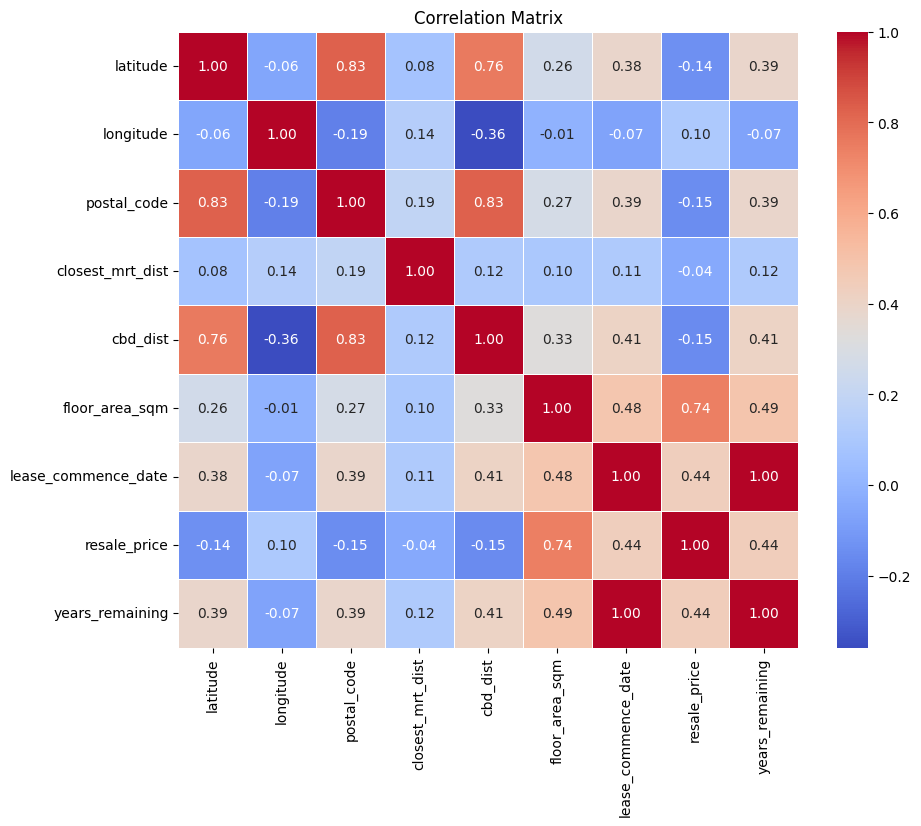

                Column  Correlation
0         resale_price     1.000000
1       floor_area_sqm     0.741407
2      years_remaining     0.438884
3  lease_commence_date     0.435464
4            longitude     0.103091
5     closest_mrt_dist    -0.041485
6             latitude    -0.136107
7          postal_code    -0.147919
8             cbd_dist    -0.153670


In [23]:
correlation = df.corr(numeric_only=True)


# Plot correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Extract correlation values for resale_price
resale_price_correlation = correlation['resale_price'].sort_values(ascending=False)

# Create a DataFrame to display the correlation values
correlation_table = pd.DataFrame({
    'Column': resale_price_correlation.index,
    'Correlation': resale_price_correlation.values
})

# Print correlation values sorted by strength
print(correlation_table)

**Insights**:

This correlation matrix is used to determine the relationship between numerical features and resale price. 

- From the table we can observe that floor_area_sqm has the strongest positive correlation with resale price at 0.74. 

- This gives us an insight that bigger flats have higher resale value. 

- The other features such as years_remaining, lease_commencement_date, and longitude have moderate positive correlations indicatiing these columns have an influence on resale price and would be useful for model training.

---

- In contrast, the features such as closest_mrt_dist, cbd_dist, postal_code and latitude have negative correlation with resale price. 

- Both cbd_dist and postal_code have a correlation of -0.1537 and -0.1479 respectively. 

- However, negative correlation does not mean the columns are not useful and further analysis has to be done to determine the importance of these columns.

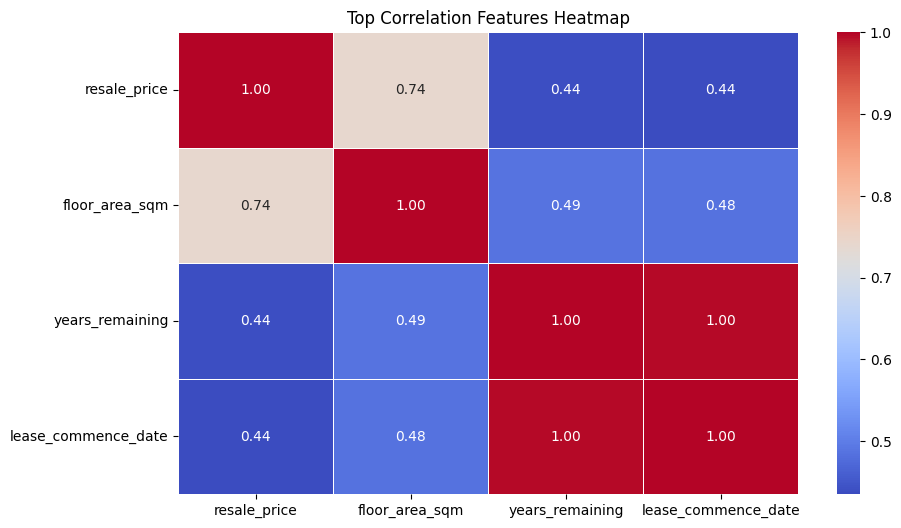

In [24]:
# Select features with correlation greater than 0.3 
top_correlation_features = resale_price_correlation[resale_price_correlation.abs() > 0.3].index

# Plot heatmap for top correlation features
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_correlation_features].corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Top Correlation Features Heatmap')
plt.show()

**Insights**:

- An interesting insight that lease commencement date and years remaining are also highly correlated at 1.00. 

- Both years_remaining and lease_commencement date have the same correlation with resale price. This suggests the possibility of multicollinearity.

### 2. **Preprocessing and Feature Engineering**

In this section new columns were engineered, and existing columns were transformed to improve the predictive performance of the model.

In [25]:
# Convert 'month' column to datetime format and extract year and month
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Extract year and month from the 'month' column, and create new columns named  'transaction_year' and 'transaction_month'
df['transaction_year'] = df['month'].dt.year
df['transaction_month'] = df['month'].dt.month


**What was done:**

- The original month feature contains both year and month in a single datetime-like format, which is not directly suitable for most regression models. 

- Therefore, it was converted to datetime and decomposed into transaction_year and transaction_month to better capture temporal effects such as long-term market trends and potential seasonality in HDB resale prices

In [26]:
# Split the string into two columns (Low and High) 
split_cols = df['storey_range'].str.split(' TO ', expand=True)

# Convert to numeric, coercing errors to NaN automatically
df['lo'] = pd.to_numeric(split_cols[0], errors='coerce')
df['hi'] = pd.to_numeric(split_cols[1], errors='coerce')

# Calculate Midpoint Vectorized
df['storey_mid'] = (df['lo'] + df['hi']) / 2

# Bin 
bins = [0, 9, 19, 29, 39, 60]
labels = ["01–09", "10–19", "20–29", "30–39", "40+"]

df['storey_range_binned'] = pd.cut(df['storey_mid'], bins=bins, labels=labels)

df.drop(columns=['lo', 'hi', 'storey_mid'], inplace=True)

**What was done**:

- The original storey_range values showed overlapping and repeated ranges (e.g., “11 TO 15” and “13 TO 15”), which increased categorical noise and made comparisons misleading. 

- To address this, storey_range was parsed into numeric low/high values, converted into a midpoint then binned into broader non-overlapping storey bands. 

- This ensures each record falls into a unique storey category while preserving the general effect of floor level on resale price. The resulting feature was stored as storey_range_binned

In [27]:
# Check the data types of the columns in the DataFrame
df.dtypes

latitude                      float64
longitude                     float64
postal_code                   float64
address                        object
closest_mrt                    object
closest_mrt_dist              float64
cbd_dist                      float64
month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
years_remaining                 int64
transaction_year                int32
transaction_month               int32
storey_range_binned          category
dtype: object

In [28]:
# Convert 'postal_code' column to string type after converting it to integer
df['postal_code'] = df['postal_code'].astype(int).astype(str)


**What was done**:

- From checking the datatype we can see that postal code is of wrong data type. 

- Postal code is not a continous variable as "123456" is not smaller than "125556". 

- Therefore, the column was converted to integer to remove the decimal point and then converted to string type.

In [29]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create a DataFrame to count unique values in each categorical column
unique_counts = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df[col].nunique() for col in categorical_cols]
})

# Display as clean table which is sorted 
print(unique_counts.sort_values(by='Unique Values', ascending=False).to_string(index=False))



             Column  Unique Values
        postal_code           8021
            address           8021
              block           2046
        street_name            514
        closest_mrt             96
               town             26
       storey_range             22
         flat_model             17
          flat_type              7
storey_range_binned              5


In [30]:
# Drop high cardinality columns and muliti-collinear columns
df = df.drop(columns=['postal_code', 'address', 'block', 'street_name', 'lease_commence_date', 'closest_mrt', 'month', 'storey_range'])

**What was done**:

- The columns postal_code, address, block, street_name and closest_mrt were dropped as they are high cardinality features. These are high-cardinality location identifiers and may cause dimensionality explosion with one-hot encoding.

- Furthermore, lease_commence_date was dropped as it is highly correlated with years remaining and does not provide additional information for the model.

- The columns month and storey range are redundant as transaction year and month was extracted from month and the original storey range column is rebinned into storey_range_binned. Therefore both columns were dropped.

In [31]:
import json

town_lookup = (
    df.groupby("town")[["cbd_dist", "latitude", "longitude"]]
      .median()
      .to_dict("index")
)

town_lookup_serializable = {
    town: {k: float(v) for k, v in vals.items()}
    for town, vals in town_lookup.items()
}

with open("town_lookup.json", "w") as f:
    json.dump(town_lookup_serializable, f)


**What was done**:

- A town-level lookup table was created by grouping the dataset by town and computing the median values of cbd_dist, latitude, and longitude. 

- This ensures that realistic location-based values can be automatically filled in the Streamlit app without requiring users to input them manually. 

- The lookup is generated before one-hot encoding so that the original town column is still available. The resulting dictionary is saved as town_lookup.json for deployment use

In [32]:
ohe_cols = ["town", "flat_model", "flat_type", "storey_range_binned"]
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

**What was done**:

- The columns closest_mrt, closest_mrt_dist, town, flat_model, flat_type, storey_range_binned were one-hot encoded to convert them into a format suitable for regression models.

- These columns were one-hot encoded because they are categorical labels with no true numerical ordering. One-hot encoding prevents the model from assuming false rank relationships.

In [33]:
# Check a sample of the DataFrame 
df.sample(5)

,latitude,longitude,closest_mrt_dist,cbd_dist,floor_area_sqm,resale_price,years_remaining,transaction_year,transaction_month,town_BEDOK,...,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,storey_range_binned_10–19,storey_range_binned_20–29,storey_range_binned_30–39,storey_range_binned_40+
5944,1.367785,103.875012,1399.640582,9739.398902,121.0,500000.0,74,2014,9,False,...,False,False,False,True,False,False,True,False,False,False
9416,1.397404,103.908974,1628.510821,14185.383659,110.0,523000.0,89,2013,2,False,...,False,False,False,True,False,False,False,False,False,False
45334,1.444277,103.799681,433.040269,18735.542740,122.0,470000.0,83,2013,3,False,...,False,False,False,True,False,False,False,False,False,False
26769,1.362005,103.853880,999.941595,8740.633473,44.0,282000.0,66,2012,8,False,...,True,False,False,False,False,False,False,False,False,False
14009,1.367396,103.838150,482.958703,9446.144132,92.0,452000.0,65,2012,7,False,...,False,False,True,False,False,False,False,False,False,False


In [34]:
df.shape

(51948, 60)

In [35]:
print(df.dtypes.value_counts())

bool       51
float64     6
int32       2
int64       1
Name: count, dtype: int64


In [36]:
# Check the columns of the DataFrame after all transformations before model building
print(df.columns.tolist())


['latitude', 'longitude', 'closest_mrt_dist', 'cbd_dist', 'floor_area_sqm', 'resale_price', 'years_remaining', 'transaction_year', 'transaction_month', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN', 'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved', 'flat_model_Improved-Maisonette', 'flat_model_Maisonette', 'flat_model_Model A', 'flat_model_Model A-Maisonette', 'flat_model_Model A2', 'flat_model_Multi Generation', 'flat_model_New Generation', 'flat_model_Premium Apartment', 'flat_model_Premium Maisonette', 'flat_model_Simplified', 'flat_model_Standard', 'flat_mod

### 3. **Model Building & Evaluation of Models**

In this section, 6 regression models were trained and evaluated to predict `resale_price`. The purpose is to compare models that represent different learning behaviours (linear baseline, regularised linear, robust regression, and non-linear tree ensembles).

**Models Trained**

1. **LinearRegression**  
   Baseline model to establish a minimum expected performance and assess whether relationships are largely linear.

2. **Ridge Regression**  
   Regularised linear model (L2) to reduce overfitting and handle multicollinearity, serving as a stronger linear baseline.

3. **HuberRegressor**  
   Robust linear model that is less sensitive to outliers, which is useful for housing prices where extreme values may exist.

4. **DecisionTreeRegressor**  
   Simple non-linear model to capture interactions and non-linear patterns; used as a baseline for tree-based learning.

5. **GradientBoostingRegressor**  
   Ensemble model that improves predictive power by combining weak learners; effective for tabular datasets with non-linear effects.

6. **HistGradientBoostingRegressor**
   Scalable boosting method that typically performs strongly on structured/tabular data and trains efficiently on larger datasets.

**Evaluation Metrics**

- **MAE (Mean Absolute Error)** 
  Measures the average absolute prediction error and is directly interpretable in dollars, making it suitable for real-world pricing tasks.

- **R² Score**
  Indicates how much variance in resale prices is explained by the model.

**Summary**

Models were compared primarily using **MAE**, with **R²** used as supporting evidence. The best-performing models were selected for further refinement, including cross-validation, hyperparameter tuning, learning curve analysis, and final model diagnostics.



In [37]:
# Split the dataset into features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = df.drop(['resale_price'], axis=1)
y = df['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [38]:
# Import the selected regression models from scikit-learn
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

# Models that require feature scaling (linear models)
scaling_models = {
    "Ridge": Ridge(),
    "HuberRegressor": HuberRegressor(max_iter=2000),
}

# Models that do not require scaling (tree-based)
normal_models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=7),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=7),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(random_state=7),
}


In [39]:
# Import libraries for model training and evaluation
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score

results = []

# Log-transform target (train on log scale)
y_train_log = np.log1p(y_train)

# Train models with scaling (fit on log target, evaluate in SGD) 
for name, model in scaling_models.items():
    pipe = Pipeline([
        ("scaler", RobustScaler()),
        ("model", model)
    ])

    pipe.fit(X_train, y_train_log)

    # Predict
    y_pred_log = pipe.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "R2 Score": r2
    })

# Train models without scaling
for name, model in normal_models.items():
    model.fit(X_train, y_train_log)

    # Predict
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "R2 Score": r2
    })

# Format and print the results
results_df = pd.DataFrame(results).sort_values(by="MAE").reset_index(drop=True)

print("\n{:30s} {:>15s} {:>10s}".format("Model", "MAE (SGD)", "R2 Score"))
print("-" * 60)
for _, row in results_df.iterrows():
    print("{:30s} {:15,.2f} {:10.4f}".format(
        row["Model"],
        row["MAE"],
        row["R2 Score"]
    ))



Model                                MAE (SGD)   R2 Score
------------------------------------------------------------
HistGradientBoostingRegressor        18,119.75     0.9591
DecisionTreeRegressor                22,502.42     0.9339
GradientBoostingRegressor            24,870.60     0.9222
HuberRegressor                       29,774.21     0.8878
Ridge                                29,791.36     0.8903
LinearRegression                     29,795.59     0.8904


**Insights**:

- HistGradientBoostingRegressor outperforms all other models, achieving the lowest MAE of $18,119.75 and the highest R2 of 0.9591. This indicates that it not only minimizes average prediction error but also explains approximately 95.9% of the variance in resale prices.

- DecisionTreeRegressor performs reasonably well but shows higher MAE and lower R2.

- GradientBoostingRegressor performs competitively but does not surpass HistGradientBoosting, likely due to less efficient histogram-based optimisation and weaker generalisation.

- Linear models (LinearRegression, Ridge, and HuberRegressor) perform significantly worser with MAE close to $29.8k and R2 around 0.89. This suggests that the relationship between features and resale price is strongly non-linear, making tree-based ensemble methods more suitable.

#### 3.1 **Cross-Validation**

To evaluate the generalization performance of the top models, 5 fold cross-validation was applied using KFold. This method is used to train and validate the model on multiple different splits of the data. This provides a much more reliable estimate on the performance of the model.

**Configuration**

`n_splits` = 5

`shuffle` = True

`random_state` = 7

**Scoring Metrics**

- Mean Absolute Error (MAE): Calculated in SGD to represent the average dollar amount the model's predictions deviate from actual resale prices.

- R2 Score (SGD): Calculated in SGD to measure the proportion of variance in actual resale prices explained by the model.

- R2 Score (Log): Maintained as a secondary metric to monitor the model's fit within the transformed mathematical space.

In [40]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score


# Define Your Top Models
top_models = {
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=7),
    "DecisionTree": DecisionTreeRegressor(random_state=7),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=7)
}

def mae_sgd_from_log(y_true_log, y_pred_log):
    """Calculates MAE in SGD (converts back from log first)"""
    y_true_sgd = np.expm1(y_true_log)
    y_pred_sgd = np.expm1(y_pred_log)
    return mean_absolute_error(y_true_sgd, y_pred_sgd)

def r2_sgd_from_log(y_true_log, y_pred_log):
    """Calculates R2 in SGD (converts back from log first)"""
    y_true_sgd = np.expm1(y_true_log)
    y_pred_sgd = np.expm1(y_pred_log)
    return r2_score(y_true_sgd, y_pred_sgd)

# Define the scoring dictionary
scoring_metric = {
    "neg_mae_sgd": make_scorer(mae_sgd_from_log, greater_is_better=False),
    "r2_sgd": make_scorer(r2_sgd_from_log), 
    "r2_log": "r2" 
}


# Log-transform target for training
y_train_log = np.log1p(y_train)

# Initialize Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=7)
cv_results = []

print(f"Running Cross-Validation on {len(top_models)} models...")


for name, model in top_models.items():
    # Run 5-Fold CV
    scores = cross_validate(
        model,
        X_train,
        y_train_log,       
        cv=cv,
        scoring=scoring_metric,
        n_jobs=-1          
    )

    # Extract results
    avg_mae_sgd = -np.mean(scores["test_neg_mae_sgd"])
    avg_r2_sgd = np.mean(scores["test_r2_sgd"])
    avg_r2_log = np.mean(scores["test_r2_log"])

    cv_results.append({
        "Model": name,
        "CV MAE (SGD)": avg_mae_sgd,
        "CV R2 (SGD)": avg_r2_sgd,
        "CV R2 (Log)": avg_r2_log
    })


cv_df = pd.DataFrame(cv_results).sort_values(by="CV MAE (SGD)").reset_index(drop=True)

print("\n{:30s} {:>15s} {:>15s} {:>15s}".format("Model", "CV MAE (SGD)", "CV R2 (SGD)", "CV R2 (Log)"))
print("-" * 80)
for _, row in cv_df.iterrows():
    print("{:30s} {:15,.2f} {:15.4f} {:15.4f}".format(
        row["Model"],
        row["CV MAE (SGD)"],
        row["CV R2 (SGD)"],
        row["CV R2 (Log)"]
    ))

Running Cross-Validation on 3 models...

Model                             CV MAE (SGD)     CV R2 (SGD)     CV R2 (Log)
--------------------------------------------------------------------------------
HistGradientBoosting                 18,312.16          0.9570          0.9594
DecisionTree                         22,947.42          0.9299          0.9329
GradientBoostingRegressor            24,757.20          0.9214          0.9276


**Insights**:

- After cross validation we continue to observe a similar kind of performance from all three models. Therefore learning curves will be used to further analyse how the models.

#### 3.2 **Learning Curve Analysis**

Learning curves are plotted to evaluate how well each model learns and whether it generalizes well. This involves training the model on increasing portions of the data and plotting the training error and validation error. Overall, it provides a visual insight to how the model is behaving, such as detecting overfitting, underfitting or it generalizes well.

**Configuration**

`train_sizes` = np.linspace(0.1, 1.0, 6)

`cv` = 5

`shuffle` = True 

`random_state` = 7

`scoring` = MAE 

`n_jobs` = -1


**Purpose**

The learning curve will give both training and validation MAE across different training set sizes. This helps us understand whether a model is underfitting or overfitting, if more data is needed and if the model generalizes well with the data.This helps in selecting a model that is not only accurate, but also stable and has good generalization.


In [41]:
from sklearn.model_selection import learning_curve, KFold
from sklearn.metrics import mean_absolute_error, make_scorer

def mae_sgd_from_log(y_true_log, y_pred_log):
    y_true_sgd = np.expm1(y_true_log)
    y_pred_sgd = np.expm1(y_pred_log)
    return mean_absolute_error(y_true_sgd, y_pred_sgd)

def plot_regression_learning_curve(model, X, y_log, title):
    cv = KFold(n_splits=5, shuffle=True, random_state=7)

    sgd_mae_scorer = make_scorer(mae_sgd_from_log, greater_is_better=False)

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y_log,                               
        scoring=sgd_mae_scorer,
        train_sizes=np.linspace(0.1, 1.0, 6),
        cv=cv,
        n_jobs=-1
    )

    train_mae = -train_scores.mean(axis=1)
    val_mae = -val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mae, marker="o", label="Training MAE (SGD)")
    plt.plot(train_sizes, val_mae, marker="o", linestyle="--", label="Validation MAE (SGD)")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("MAE (SGD)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


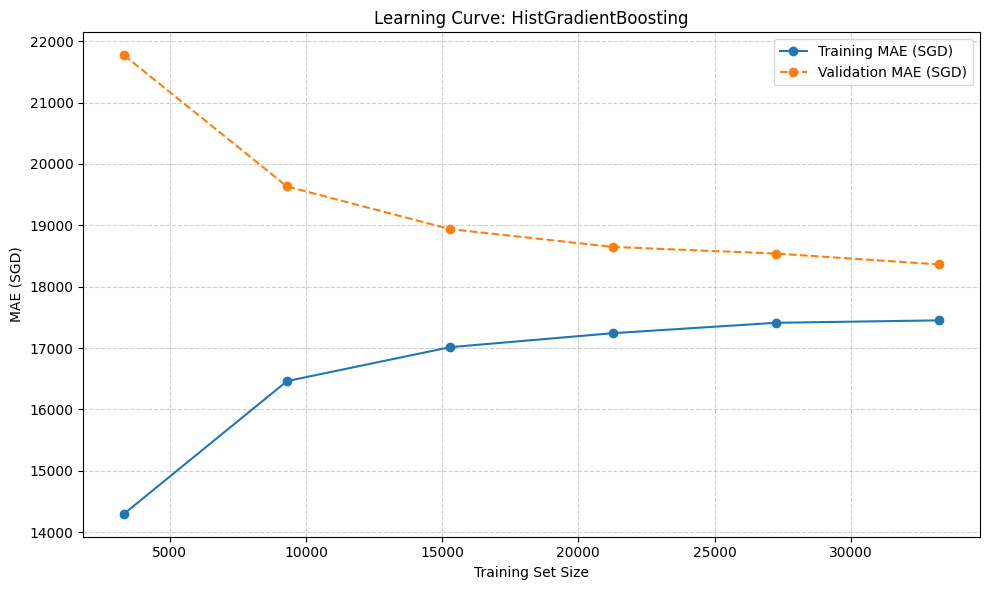

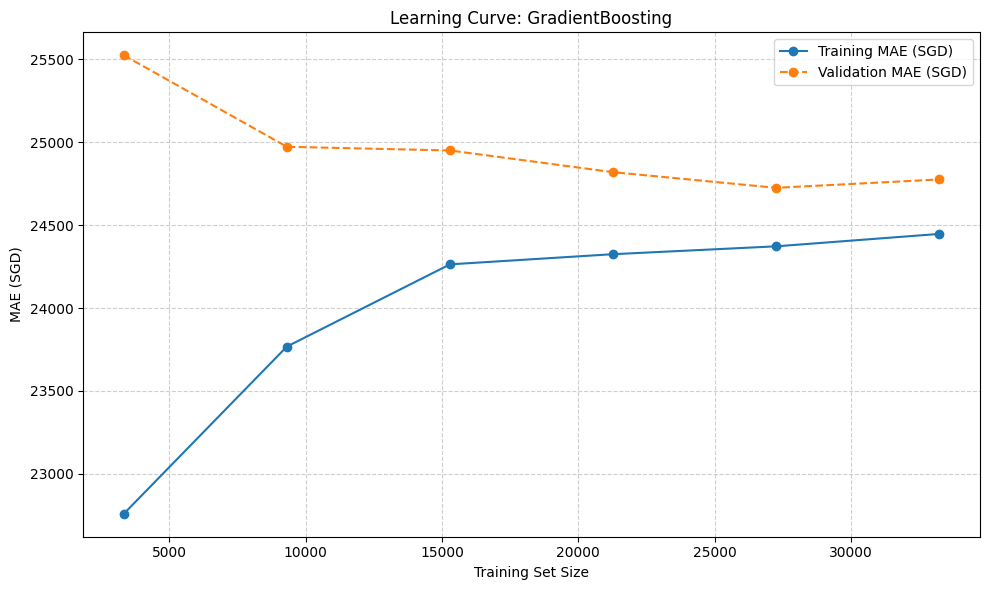

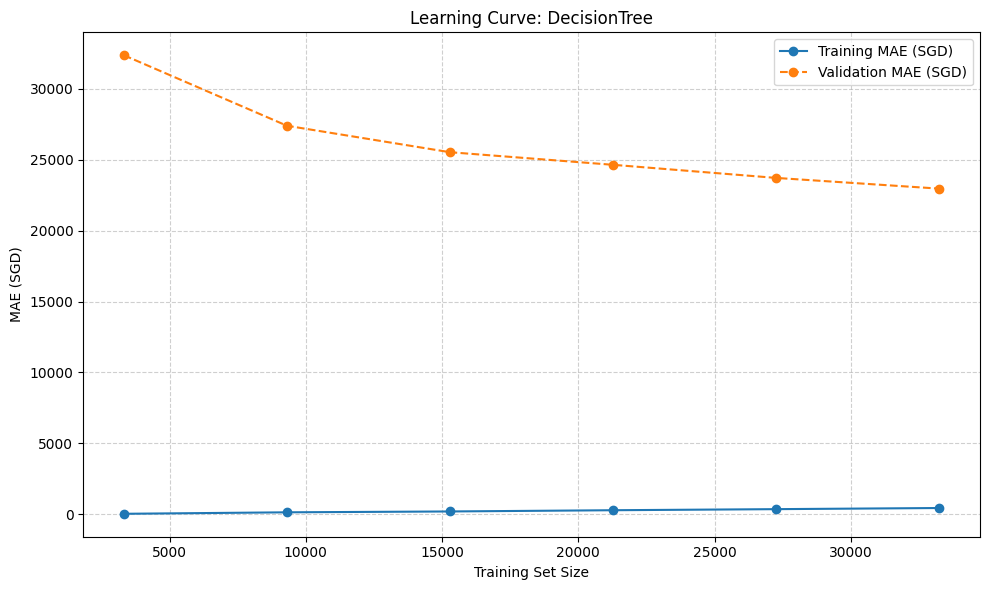

In [42]:
y_train_log = np.log1p(y_train)

hist_model1 = HistGradientBoostingRegressor(random_state=7)
hist_model2 = GradientBoostingRegressor(random_state=7)
tree_model = DecisionTreeRegressor(random_state=7)

# Generate the Plots
plot_regression_learning_curve(
    hist_model1, 
    X_train, 
    y_train_log, 
    "Learning Curve: HistGradientBoosting"
)

plot_regression_learning_curve(
    hist_model2, 
    X_train, 
    y_train_log, 
    "Learning Curve: GradientBoosting"
)

plot_regression_learning_curve(
    tree_model, 
    X_train, 
    y_train_log, 
    "Learning Curve: DecisionTree"
)

**Insights**: 

- After plotting and analysing the learning curves for all three models. HistGradientBoostingRegressor and GradientBoostingRegressor were the best performers.

- Both the models show a small gap between training and validation MAE, as the training size increases. This indicates that the models are generalizing well and are not overfitting or underfitting. The curves are quite stable and converging smoothly.

- Though DecisionTreeRegressor it showed good performance when analysed using performance metrics, the learning curve shows the model does not generalize well with training MAE being very low (near 0) and validation MAE being very high. This indicates the model is overfitting.


- Therefore, out of the three models, HistGradientBoostingRegressor and GradientBoostingRegressor are the chosen models to be hypertuned to further improve the performance of the models using optimal parameters.

#### 3.3 **Hyperparamter Tuning and Evaluation**





**Strategies**:

- GridSearchCV was used for HistGradientBoostingRegressor (due to its computational efficiency).

- RandomizedSearchCV was used for GradientBoostingRegressor (to control computational cost).

**Evaluation Metrics**:

- MAE (SGD)

- R2 Score (SGD)

- Search time (seconds)

**HistGradientBoostingRegressor**:

- `learning_rate`: Controls the step size of boosting. Lower values improve stability; higher values speed up convergence.

- `max_iter`: Determines the number of boosting iterations, ensuring sufficient learning capacity.

- `max_leaf_nodes`: Controls tree complexity and feature interaction depth.

- `min_samples_leaf`: Prevents overly specific leaf splits, improving generalisation.

- `l2_regularization`: Adds regularisation to reduce overfitting.



**GradientBoostingRegressor**:

- `learning_rate`: Controls the contribution of each boosting stage.

- `n_estimators`: Number of boosting stages; higher values improve learning but increase computation.

- `max_depth`: Limits tree complexity to prevent overfitting.

- `subsample`: Introduces stochasticity to improve generalisation.

- `min_samples_split`: Controls the minimum samples required to split a node.


In [43]:
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold


def mae_sgd_from_log(y_true_log, y_pred_log):
    y_true_sgd = np.expm1(y_true_log)
    y_pred_sgd = np.expm1(y_pred_log)
    return mean_absolute_error(y_true_sgd, y_pred_sgd)

sgd_mae_scorer = make_scorer(mae_sgd_from_log, greater_is_better=False)
cv = KFold(n_splits=5, shuffle=True, random_state=7)

y_train_log = np.log1p(y_train)


hgb_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_iter": [200, 500],
    "max_leaf_nodes": [31, 63, 127],
    "min_samples_leaf": [20, 50],
    "l2_regularization": [0.0, 0.1]
}

print("Grid Search on HistGradientBoosting...")
start_hgb = time.time()

hgb_search = GridSearchCV(
    estimator=HistGradientBoostingRegressor(random_state=7),
    param_grid=hgb_grid,
    cv=cv,
    scoring=sgd_mae_scorer,
    n_jobs=-1
)

hgb_search.fit(X_train, y_train_log)
hgb_time = time.time() - start_hgb

print(f"Completed in {hgb_time:.1f}s")
print(f"Best HGB Params: {hgb_search.best_params_}")
print(f"Best CV MAE (SGD): {-hgb_search.best_score_:,.2f}")

hgb_best_model = hgb_search.best_estimator_


gb_param_dist = {
    "n_estimators": [200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 8],
    "subsample": [0.8, 0.9, 1.0],
    "min_samples_split": [5, 10, 20]
}

print("\nRandom Search on GradientBoosting...")
start_gb = time.time()

gb_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=7),
    param_distributions=gb_param_dist,
    n_iter=20,
    cv=cv,
    scoring=sgd_mae_scorer,
    n_jobs=-1,
    random_state=7
)

gb_search.fit(X_train, y_train_log)
gb_time = time.time() - start_gb

print(f"Completed in {gb_time:.1f}s")
print(f"Best GB Params: {gb_search.best_params_}")
print(f"Best CV MAE (SGD): {-gb_search.best_score_:,.2f}")

gb_best_model = gb_search.best_estimator_


results = []

y_pred_hgb = np.expm1(hgb_best_model.predict(X_test))
results.append({
    "Model": "HistGradientBoosting (Grid)",
    "Test MAE (SGD)": mean_absolute_error(y_test, y_pred_hgb),
    "Test R2 (SGD)": r2_score(y_test, y_pred_hgb),
    "Search Time (s)": hgb_time
})

y_pred_gb = np.expm1(gb_best_model.predict(X_test))
results.append({
    "Model": "GradientBoosting (Random)",
    "Test MAE (SGD)": mean_absolute_error(y_test, y_pred_gb),
    "Test R2 (SGD)": r2_score(y_test, y_pred_gb),
    "Search Time (s)": gb_time
})

df_results = pd.DataFrame(results).sort_values(by="Test MAE (SGD)").reset_index(drop=True)

print("\n" + "-"*60)
print("FINAL HOLDOUT RESULTS")
print("-"*60)
print(df_results)


Grid Search on HistGradientBoosting...
Completed in 195.7s
Best HGB Params: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_iter': 500, 'max_leaf_nodes': 63, 'min_samples_leaf': 20}
Best CV MAE (SGD): 15,602.36

Random Search on GradientBoosting...
Completed in 590.8s
Best GB Params: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 20, 'max_depth': 8, 'learning_rate': 0.1}
Best CV MAE (SGD): 15,494.22

------------------------------------------------------------
FINAL HOLDOUT RESULTS
------------------------------------------------------------
                         Model  Test MAE (SGD)  Test R2 (SGD)  Search Time (s)
0  HistGradientBoosting (Grid)    15339.940300       0.970827       195.695615
1    GradientBoosting (Random)    15420.484914       0.969907       590.776404


**Insights**:

- HistGradientBoosting (GridSearchCV) achieved a CV MAE of $15,602.36 and a final test MAE of $15,339.94, with an R2 of 0.9708. The grid search completed faster than GradientBoosting, demonstrating both strong accuracy and computational efficiency.

- GradientBoosting (RandomizedSearchCV) achieved a slightly lower best CV MAE of $15,494.22, and a final test MAE of $15,420.48, with an R2 of 0.9699. The search required more than double the tuning time of HistGradientBoosting.

- Although GradientBoosting achieved marginally better CV performance, the final holdout results show that HistGradientBoosting slightly outperformed it on unseen test data, while also requiring significantly less tuning time.

- Overall, HistGradientBoosting provides the best trade-off between accuracy, stability, and computational efficiency

#### 3.4 **Tuned Model Learning Curve Analysis**

The learning curve for the best model HistGradientBoostingRegressor was plotted again after hyperparameter tuning to further analyse the performance of the model.

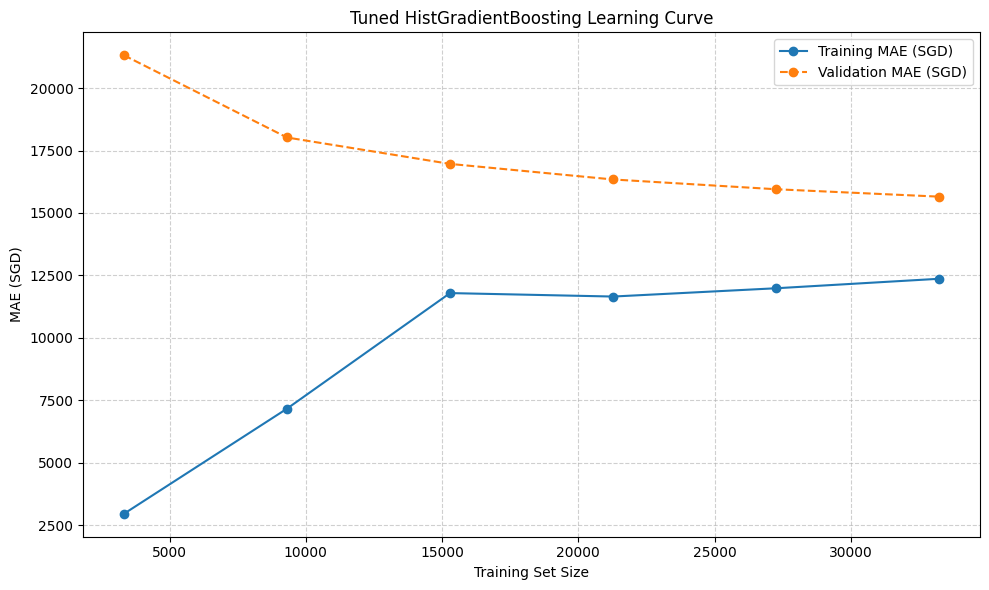

In [44]:
plot_regression_learning_curve(
    model=hgb_best_model, 
    X=X_train, 
    y_log=y_train_log, 
    title="Tuned HistGradientBoosting Learning Curve"
)

**Insights**:

- The learning curve shows that as the training set size increases, validation MAE steadily decreases and stabilizes around ~$15.6k, indicating improved generalisation. 

- The gap between training and validation error narrows significantly, suggesting reduced overfitting. 

- Both curves converge smoothly without divergence, confirming that the tuned HistGradientBoosting model achieves a strong bias–variance balance and benefits from additional data.

 

               feature  MAE_increase_SGD
0       floor_area_sqm      85862.221686
1             cbd_dist      38195.435141
2     flat_type_4 ROOM      12375.533818
3      years_remaining      10018.224140
4             latitude       9009.198275
5     closest_mrt_dist       8907.276397
6            longitude       7868.772509
7     transaction_year       7083.715663
8     flat_type_3 ROOM       4731.593131
9  flat_type_EXECUTIVE       3427.099181


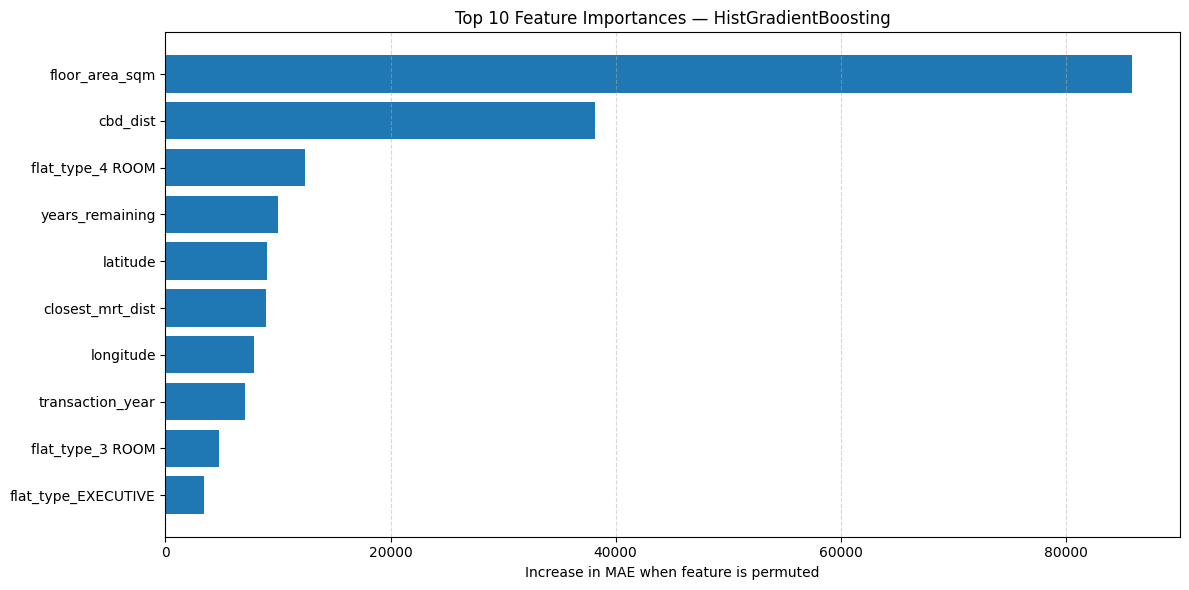

In [45]:
from sklearn.inspection import permutation_importance


def mae_sgd_from_log_pred(estimator, X, y_true_sgd):
    y_pred_log = estimator.predict(X)
    y_pred_sgd = np.expm1(y_pred_log)
    return mean_absolute_error(y_true_sgd, y_pred_sgd)


result = permutation_importance(
    hgb_best_model,
    X_test,
    y_test,
    scoring=mae_sgd_from_log_pred,
    n_repeats=10,
    random_state=7,
    n_jobs=-1
)

mae_increase = -result.importances_mean

# Top 10
top_n = 10
top_idx = np.argsort(mae_increase)[-top_n:][::-1]  

top_df = pd.DataFrame({
    "feature": X_test.columns[top_idx],
    "MAE_increase_SGD": mae_increase[top_idx]
})

print(top_df)

# Plot (top 10) 
plt.figure(figsize=(12, 6))
plt.barh(top_df["feature"][::-1], top_df["MAE_increase_SGD"][::-1])  
plt.xlabel("Increase in MAE when feature is permuted")
plt.title(f"Top {top_n} Feature Importances — HistGradientBoosting")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Insights**:

- The bar chart shows the importance of features in the HistGradientBoostingRegressor model.

- The most important feature is floor_area_sqm, which is consistent with the earlier correlation analysis and visualisations that showed a strong positive relationship between floor area and resale price.

- The other important feature includes cbd_dist. This suggests that both the physical attributes of the flat (floor area) and location-based factors (CBD distance) play significant roles in determining resale price.

#### 3.5 **HistGradientBoostingRegressor Justification**

A range of regression models were trained and compared to predict resale_price, covering linear baselines and tree-based ensemble methods. Model selection was guided primarily by MAE (SGD) for interpretability, with R2 used as a supporting indicator of explained variance.

The best-performing candidates were shortlisted for deeper validation using K-Fold cross-validation and learning curve analysis to assess generalisation behaviour. Across these evaluations, HistGradientBoostingRegressor (HGB) emerged as the most reliable model.

**Reasons for selecting HGB:**

- Consistently best predictive performance:
HGB achieved the lowest MAE and strongest overall performance compared to the other shortlisted models.

- Strong generalisation:
The learning curve showed a low validation MAE with a small gap between training and validation error, suggesting a good balance between underfitting and overfitting.

- Outperformed simpler and unstable alternatives:
Compared to DecisionTreeRegressor, which showed clear overfitting (near-zero training error with much higher validation error), HGB generalised significantly better. It also consistently outperformed linear models, indicating that the resale price relationship is non-linear and benefits from an ensemble approach.

- Better than GradientBoostingRegressor:
HGB performed better both before and after tuning, and also trained faster due to its histogram-based optimisation.

**Summary**

Based on cross-validation results and learning curve diagnostics, HistGradientBoostingRegressor was selected as the final model due to its strong generalisation, strong predictive accuracy (low MAE in SGD), and efficient training behaviour. 

### 4. **Best Model Visualisations**

The best model HGB is further analysed using actual vs predicted scatter plot and residual plot. This will help conclude the performance of the model.

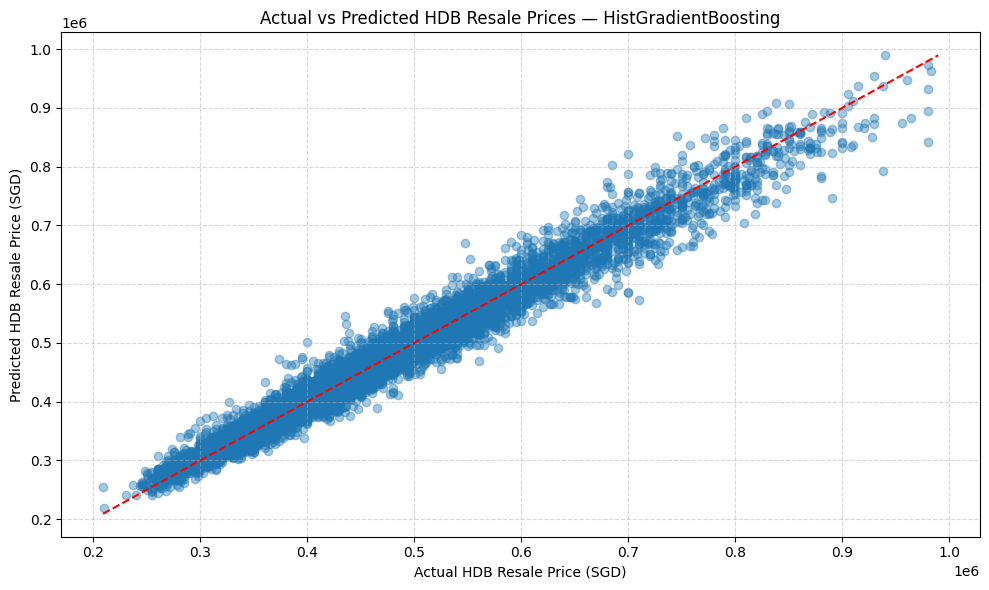

In [46]:
# Predict in log space 
y_pred_log = hgb_best_model.predict(X_test)
y_pred_sgd = np.expm1(y_pred_log)

# Plot Actual vs Predicted (SGD)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sgd, alpha=0.4)
plt.xlabel("Actual HDB Resale Price (SGD)")
plt.ylabel("Predicted HDB Resale Price (SGD)")
plt.title("Actual vs Predicted HDB Resale Prices — HistGradientBoosting")

# prediction line
min_val = min(y_test.min(), y_pred_sgd.min())
max_val = max(y_test.max(), y_pred_sgd.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="red")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Insights**:

- The Actual vs Predicted plot shows a strong linear trend, indicating high predictive accuracy and strong model fit. 

- Most predictions cluster closely around the diagonal, confirming that the model captures resale price trends effectively. 

- There is some dispersion at higher price ranges, suggesting mild heteroscedasticity. However it is expected as there is less data at higher price ranges and the model may have more difficulty predicting extreme values.

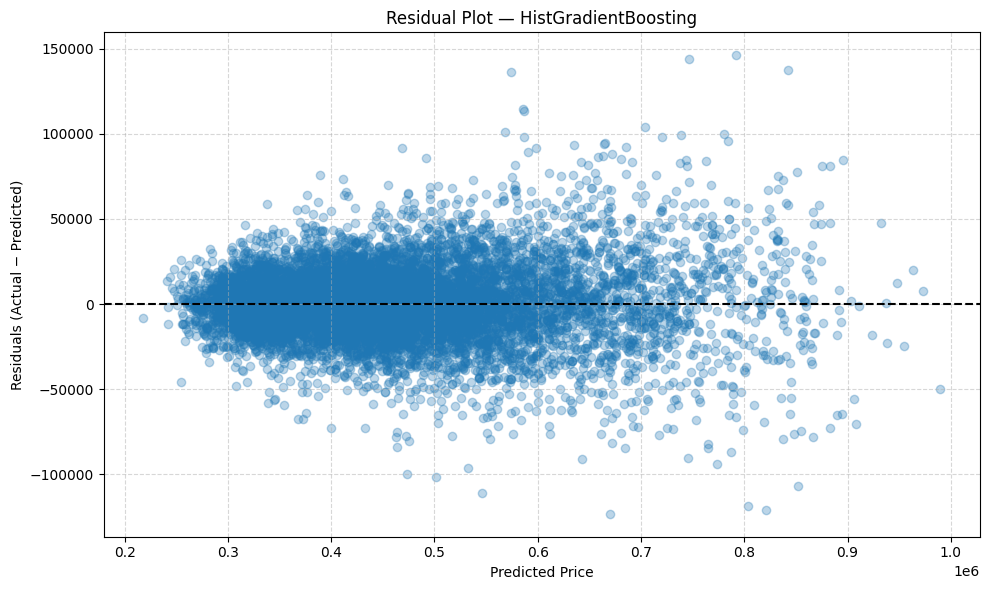

In [47]:
# Residuals (Actual - Predicted) in SGD
residuals = y_test - y_pred_sgd

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sgd, residuals, alpha=0.3)

plt.axhline(0, color="black", linestyle="--")
plt.title("Residual Plot — HistGradientBoosting")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual − Predicted)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Insights**:

- The residual plot shows that errors are generally centered around zero, indicating no strong bias in the model’s predictions. 

- The spread of residuals increases slightly at higher predicted prices, suggesting mild heteroscedasticity as seen in the actual vs predicted plot. 

- Despite this increasing variance, there is no clear pattern or curvature, confirming that the tuned HistGradientBoosting model maintains stable and unbiased predictions across the price range

In [48]:
from IPython.display import display

# We convert log-scale back to actual SGD
y_pred_log = hgb_best_model.predict(X_test)
y_pred_sgd = np.expm1(y_pred_log)

# Calculate the key metrics
mae = mean_absolute_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_sgd)

# Create a clean DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (SGD)", "R2 Score"],
    "Value": [mae, r2]
})

# Professional Formatting
metrics_df["Value"] = metrics_df.apply(
    lambda row: f"${row['Value']:,.2f}" if "MAE" in row['Metric'] 
    else f"{row['Value']:.4f}", axis=1
)

print("Final Model Performance: HistGradientBoosting")
display(metrics_df)


Final Model Performance: HistGradientBoosting


,Metric,Value
0,Mean Absolute Error (SGD),15339.9403
1,R2 Score,0.9708


### 5. **SHAP Analysis**

SHAP (SHapley Additive exPlanations) helps us analyse and explain how each of the features contributed to the model's predictions. This makes the predictions of the model more transparent, trustworthy and interpretable.

In [49]:
import shap

# Explainer
explainer = shap.TreeExplainer(hgb_best_model)

# Sample a subset for speed (optional but recommended)
sample_size = min(1000, len(X_test))
X_sample = X_test.sample(n=sample_size, random_state=42)

# SHAP values (these explain predictions in LOG space)
shap_values = explainer.shap_values(X_sample)


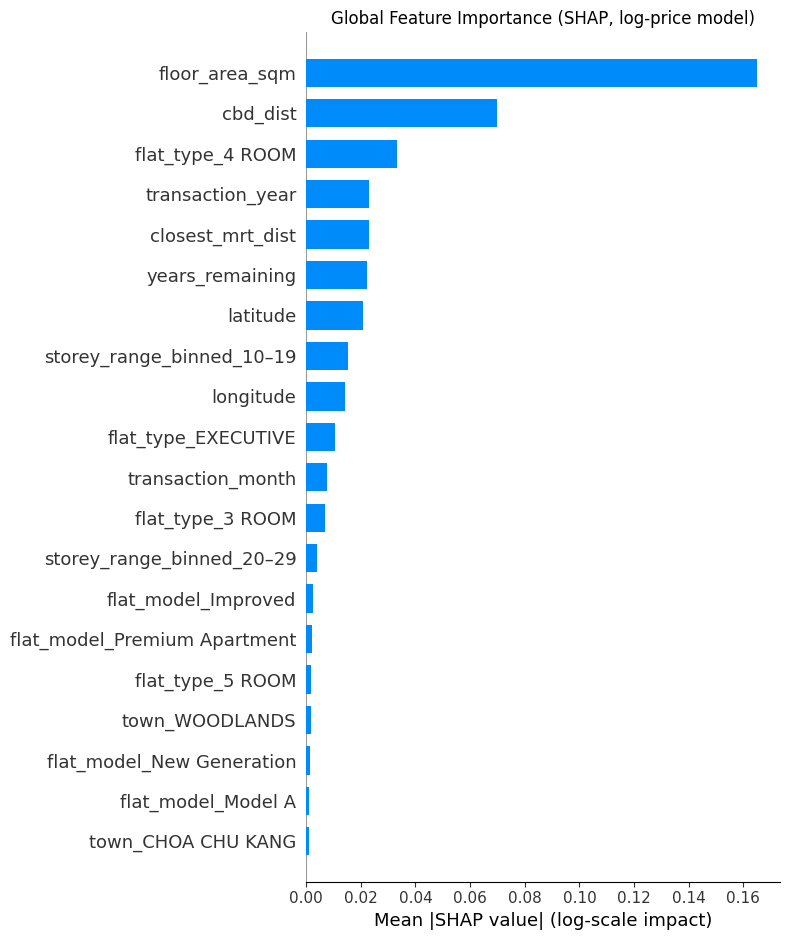

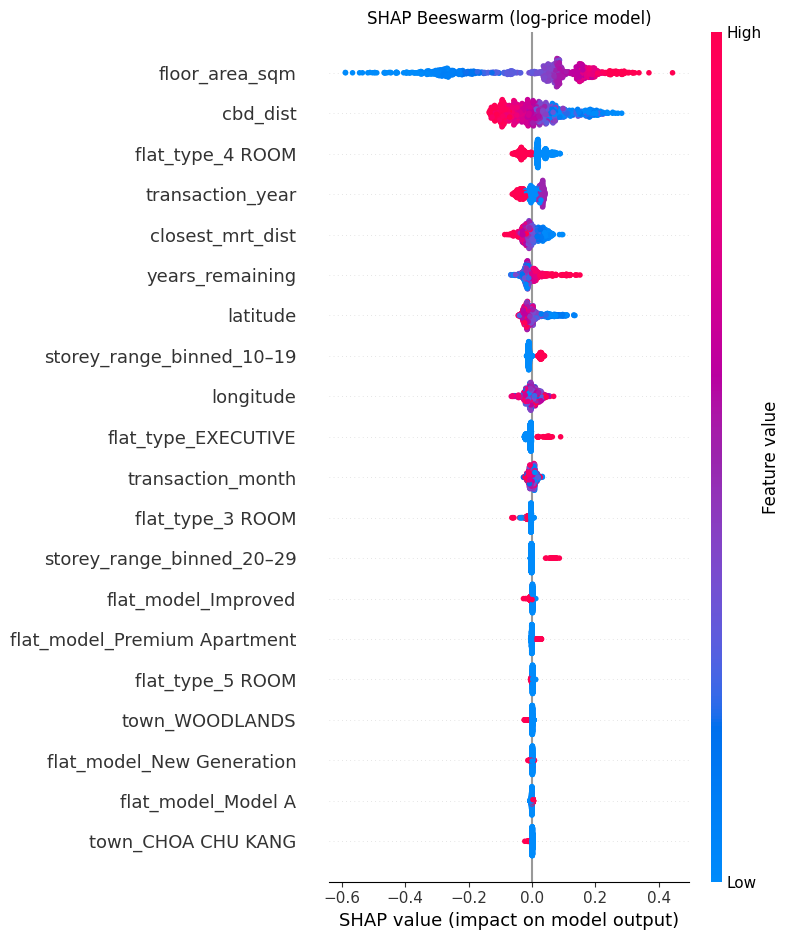

In [50]:
# Global feature importance (bar)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title("Global Feature Importance (SHAP, log-price model)")
plt.xlabel("Mean |SHAP value| (log-scale impact)")
plt.tight_layout()
plt.show()

# Beeswarm
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("SHAP Beeswarm (log-price model)")
plt.tight_layout()
plt.show()


**Insights**:

- The SHAP global feature importance plot shows that floor_area_sqm is the dominant driver of resale price, followed by cbd_dist, flat type indicating that both property size and location strongly influence valuation. 

- The beeswarm plot further reveals larger floor areas and closer proximity to the CBD increase predicted prices, while greater distance reduces them. 

- This shows the model learned meaningful relationships strengthening interpretability and model trustworthiness.

In [51]:
sv = shap_values.values if hasattr(shap_values, "values") else shap_values

# sv (n_samples, n_features)
feature_importance = np.abs(sv).mean(axis=0)

feature_names = (
    X_sample.columns.to_list()
    if hasattr(X_sample, "columns")
    else [f"Feature_{i}" for i in range(sv.shape[1])]
)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Average_Impact": feature_importance
}).sort_values("Average_Impact", ascending=False)

importance_df.head(10)



,Feature,Average_Impact
4,floor_area_sqm,0.165127
3,cbd_dist,0.069908
51,flat_type_4 ROOM,0.033171
6,transaction_year,0.023143
2,closest_mrt_dist,0.022865
5,years_remaining,0.022420
0,latitude,0.020825
55,storey_range_binned_10–19,0.015234
1,longitude,0.014226
53,flat_type_EXECUTIVE,0.010562


**Insights**:

- The table further quantifies the impact of the top features. For example, floor_area_sqm has a average impact of 0.16 on the model's predictions. 

In [52]:
# Display the range for the website
numerical_columns = ['floor_area_sqm', 'years_remaining', 'transaction_year']

for col in numerical_columns:
    print(f"{col}: min = {X[col].min():.2f}, max = {X[col].max():.2f}, mean = {X[col].mean():.2f}")

floor_area_sqm: min = 31.00, max = 266.00, mean = 96.23
years_remaining: min = 52.00, max = 98.00, mean = 75.60
transaction_year: min = 2012.00, max = 2014.00, mean = 2012.92


### 6. **Conclusion**

The final model was retrained on a streamlined 58-feature set, intentionally excluding closest_mrt_dist to improve deployment usability. Despite the removal of this feature, the model maintained exceptional performance with a Mean Absolute Error (MAE) of $15,442.30 and an R2 score of 0.9705.

Therefore, considering the high accuracy of predictions, efficiency, scalability and interpretability. HGB is the most justified and reliable model to be deployed to predict HDB resale price.

In [ ]:
import joblib

# Final feature set 
X_train_final = X_train.drop(columns=["closest_mrt_dist"], errors="ignore")
X_test_final  = X_test.drop(columns=["closest_mrt_dist"], errors="ignore")

# Align targets 
y_train_final = y_train.loc[X_train_final.index]
y_test_final  = y_test.loc[X_test_final.index]

# Log-transform target
y_train_log_final = np.log1p(y_train_final)

# Retrain final model using best tuned params

hgb_best_model = HistGradientBoostingRegressor(
    **hgb_search.best_params_,
    random_state=7
)
hgb_best_model.fit(X_train_final, y_train_log_final)


# Final holdout evaluation (SGD scale)
y_pred_sgd = np.expm1(hgb_best_model.predict(X_test_final))

final_mae = mean_absolute_error(y_test_final, y_pred_sgd)
final_r2  = r2_score(y_test_final, y_pred_sgd)

print(f"Final Build MAE (SGD): {final_mae:,.2f}")
print(f"Final Build R2  (SGD): {final_r2:.4f}")


# Save model
joblib.dump(hgb_best_model, "hgb_best_model.pkl")


# Save SHAP background sample 
sample_size = min(500, len(X_train_final))  
X_sample_final_base = X_train_final.sample(n=sample_size, random_state=7)
X_sample_final = X_sample_final_base.astype(float)

joblib.dump(X_sample_final, "X_sample.pkl")


print("\nSuccess: 'hgb_best_model.pkl', 'X_sample.pkl' are saved")

Final Build MAE (SGD): 15,442.30
Final Build R2  (SGD): 0.9705

Success: 'hgb_best_model.pkl', 'X_sample.pkl' are saved
